<a href="https://colab.research.google.com/github/itsluckysharma01/Skin_Diseases_Detection_Using_Deep-Learning/blob/main/Skin_Diseases_Detection_Using_Deep_Learning(NOTEBOOK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                               Skin_Diseases_Detection_Using_Deep-Learning(NOTEBOOK)                           

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import From Kaggle API


In [4]:
%pip install --upgrade pip
%pip uninstall -y tensorflow
%pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 47.9 MB/s  0:00:09
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 128.8 MB/s  0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [tensorflow]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is inc

In [5]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/DATASET/IMG_CLASSES_DATASET.zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 128
CHANNELS = 3
EPOCHS = 50

In [7]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    r"/content/IMG_CLASSES_DATASET",  #Directory containing the dataset
    shuffle=True,  #Shuffle the dataset
    image_size=(IMAGE_SIZE,IMAGE_SIZE),  #Resize images to 256x256 pixels
    batch_size=BATCH_SIZE  #Batch size for training
    )

Found 16501 files belonging to 33 classes.


In [8]:
class_names = [name.split('(')[0].strip() for name in dataset.class_names]
class_names

['1. Eczema',
 '10. Warts Molluscum and other Viral Infections',
 '11. Pigment',
 '12. Enfeksiyonel',
 '13. Akne',
 '14. Enfeksiyonel',
 '15. Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 '16. Bullous Disease Photos',
 '17. Cellulitis Impetigo and other Bacterial Infections',
 '18. Exanthems and Drug Eruptions',
 '19. Hair Loss Photos Alopecia and other Hair Diseases',
 '2. Melanoma',
 '20. Herpes HPV and other STDs Photos',
 '21. Light Diseases and Disorders of Pigmentation',
 '22. Lupus and other Connective Tissue diseases',
 '23. Nail Fungus and other Nail Disease',
 '24. Poison Ivy Photos and other Contact Dermatitis',
 '25. Rosacea Photos',
 '26. Scabies Lyme Disease and other Infestations and Bites',
 '27. Seborrheic Keratoses and other Benign Tumors',
 '28. Systemic Disease',
 '29. Tinea Ringworm Candidiasis and other Fungal Infections',
 '3. Atopic Dermatitis',
 '30. Urticaria Hives',
 '31. Vascular Tumors',
 '32. Vasculitis Photos',
 '33. Warts Molluscu

In [9]:
len(dataset)

129

In [10]:
129*128

16512

# 16512 images in total last batch was not proper
# 128 was Batch size

# EXPLORE DATA

In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(128, 256, 256, 3)
[14 27 20 27 15  1 17 10  1 31 27  3  8 25 29  6 17  9  5 16  1 30 27  8
  6 19 26 12 13  0 27  7 24 18 28 23 15 25  2 24  3 20 13 24 11 12 20  0
  1 30 19 32 27  0 13  4 24 28  7 32 28  3  3 31 11 27  6 25 31  3  3 13
  6 18 29 13  3  1 31  2 24  2 29 27 13  6  5  7  0  7 12 13 28 25 14 30
 27 14 25 11  3  2  2 11 23 18 17 31  7 19 19 27 30 27 26 22 23  2 18 20
 22 25 15 27 25 13 11 22]


(128, 256, 256, 3)


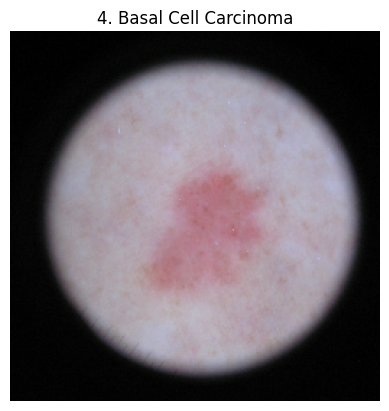

In [12]:
for image_batch, labels_batch in dataset.take(1):
    # print(image_batch[0]) # it will give image as a tensor
    # print(image_batch[0].numpy()) # it will give label as a numpy array
    print(image_batch.shape)  # (32, 256, 256, 3) 32 images of size 256x256 with 3 channels
    plt.imshow(image_batch[0].numpy().astype("uint8"))  # Display the first image
    plt.axis("off")  # Hide the axis
    plt.title(class_names[labels_batch[0]])  # Display the label of the first

# Display a batch of images

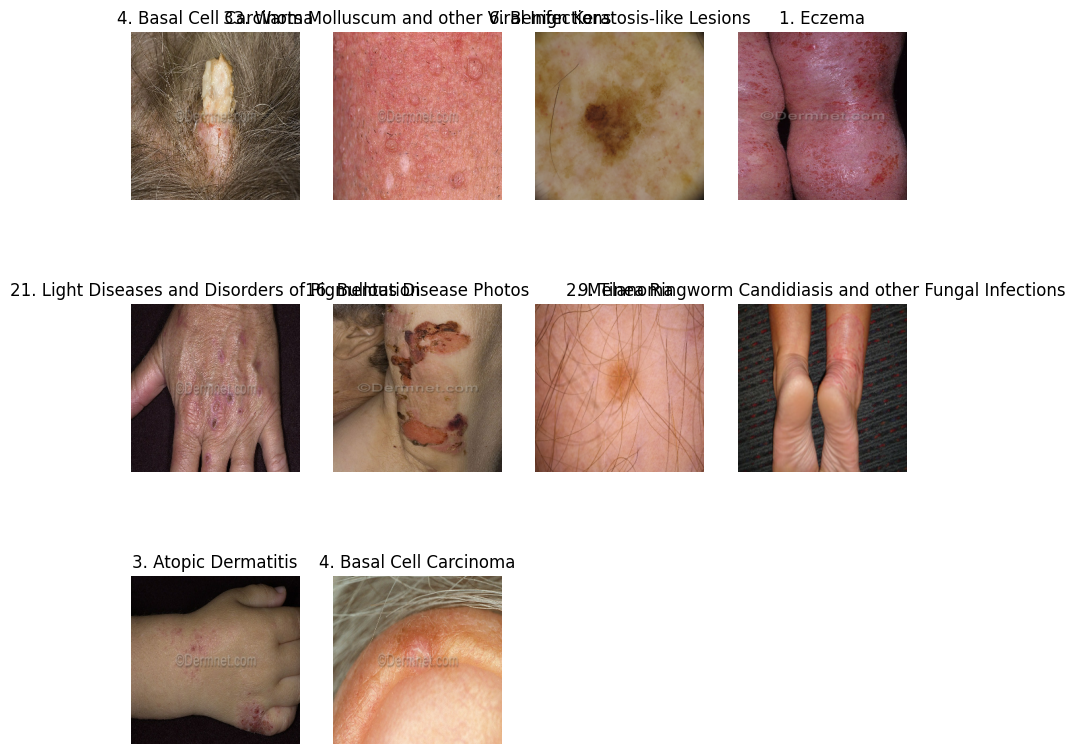

In [13]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")


# Split the DATASET

Split The dataset Into Test and Train
Validation and test datasets are 10% each, while the training dataset is 80%. With every epoch, the model will learn from the training dataset, validate its performance on the validation dataset, and finally test its accuracy on the test dataset.

After epoch we will use test dataset to check the accuracy of the model before the deploy.

80% ==> training

***20% ==> 10% ==> validation, 10% ==> test**

# Task
Analyze the class distribution of the dataset, choose a technique to handle data imbalance, implement the chosen technique, prepare the data for model training, train the model, evaluate the model, and summarize the approach and results.

## Analyze class distribution

### Subtask:
Visualize or print the number of images in each class to confirm the extent of the imbalance.


**Reasoning**:
Iterate through the dataset to count the number of images in each class and store the counts in a dictionary.



In [14]:
from collections import Counter

class_counts = Counter()
for _, labels_batch in dataset:
    class_counts.update(labels_batch.numpy())

sorted_class_counts = sorted(class_counts.items(), key=lambda item: item[0])

for class_index, count in sorted_class_counts:
    print(f"Class {class_names[class_index]}: {count} images")

Class 1. Eczema: 500 images
Class 10. Warts Molluscum and other Viral Infections: 500 images
Class 11. Pigment: 500 images
Class 12. Enfeksiyonel: 500 images
Class 13. Akne: 322 images
Class 14. Enfeksiyonel: 500 images
Class 15. Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 500 images
Class 16. Bullous Disease Photos: 448 images
Class 17. Cellulitis Impetigo and other Bacterial Infections: 288 images
Class 18. Exanthems and Drug Eruptions: 404 images
Class 19. Hair Loss Photos Alopecia and other Hair Diseases: 239 images
Class 2. Melanoma: 1000 images
Class 20. Herpes HPV and other STDs Photos: 405 images
Class 21. Light Diseases and Disorders of Pigmentation: 568 images
Class 22. Lupus and other Connective Tissue diseases: 420 images
Class 23. Nail Fungus and other Nail Disease: 500 images
Class 24. Poison Ivy Photos and other Contact Dermatitis: 260 images
Class 25. Rosacea Photos: 500 images
Class 26. Scabies Lyme Disease and other Infestations and Bites: 431 

In [17]:
from collections import Counter

class_counts = Counter()
for _, labels_batch in dataset:
    class_counts.update(labels_batch.numpy())

# Sort by class index (which is already numerical)
sorted_class_counts = sorted(class_counts.items(), key=lambda item: item[0])

for class_index, count in sorted_class_counts:
    print(f"Class {class_names[class_index]}")

Class 1. Eczema
Class 10. Warts Molluscum and other Viral Infections
Class 11. Pigment
Class 12. Enfeksiyonel
Class 13. Akne
Class 14. Enfeksiyonel
Class 15. Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Class 16. Bullous Disease Photos
Class 17. Cellulitis Impetigo and other Bacterial Infections
Class 18. Exanthems and Drug Eruptions
Class 19. Hair Loss Photos Alopecia and other Hair Diseases
Class 2. Melanoma
Class 20. Herpes HPV and other STDs Photos
Class 21. Light Diseases and Disorders of Pigmentation
Class 22. Lupus and other Connective Tissue diseases
Class 23. Nail Fungus and other Nail Disease
Class 24. Poison Ivy Photos and other Contact Dermatitis
Class 25. Rosacea Photos
Class 26. Scabies Lyme Disease and other Infestations and Bites
Class 27. Seborrheic Keratoses and other Benign Tumors
Class 28. Systemic Disease
Class 29. Tinea Ringworm Candidiasis and other Fungal Infections
Class 3. Atopic Dermatitis
Class 30. Urticaria Hives
Class 31. Vascular Tum

**Reasoning**:
The dataset variable was not defined because the notebook state was reset. Re-run the cell that loaded and prepared the dataset.

